In [64]:
## VAMO LÁ TIME
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans

from colors import *

In [34]:
jorel = 'imgs/jorel.jpeg'
steven = 'imgs/steven.jpeg'

img_j = Image.open(jorel)
img_s = Image.open(steven)

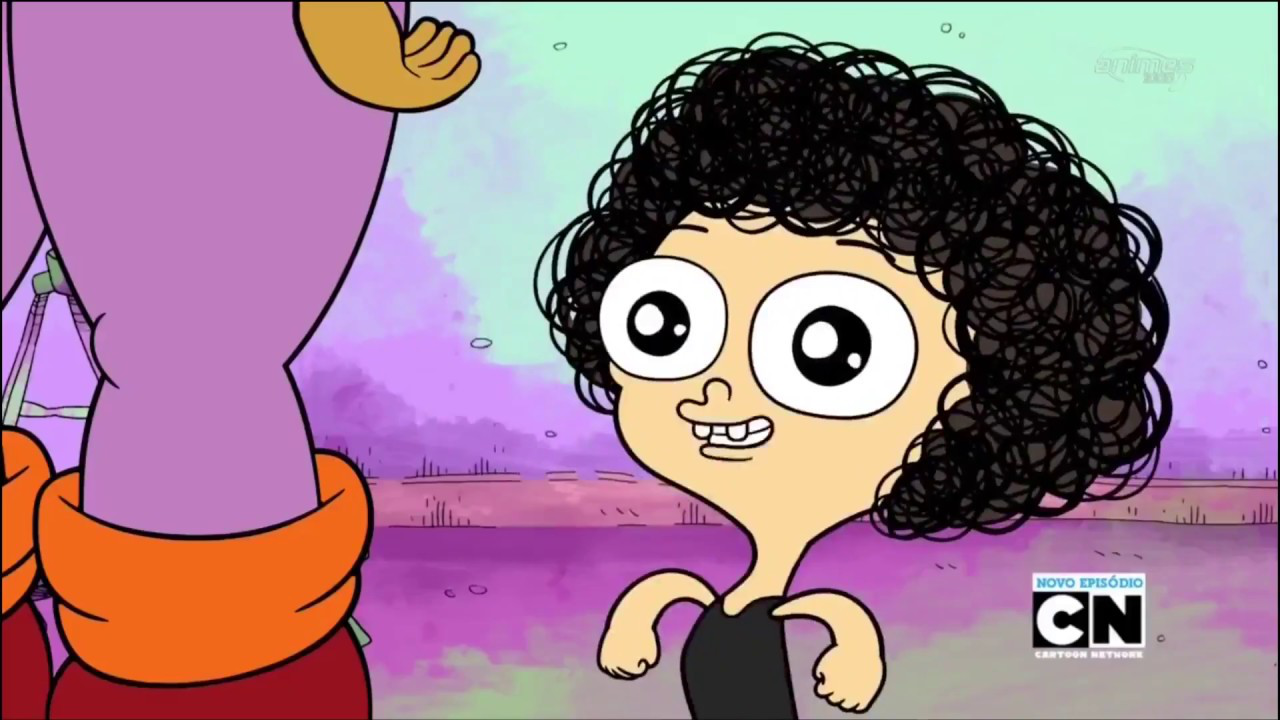

In [19]:
img_j

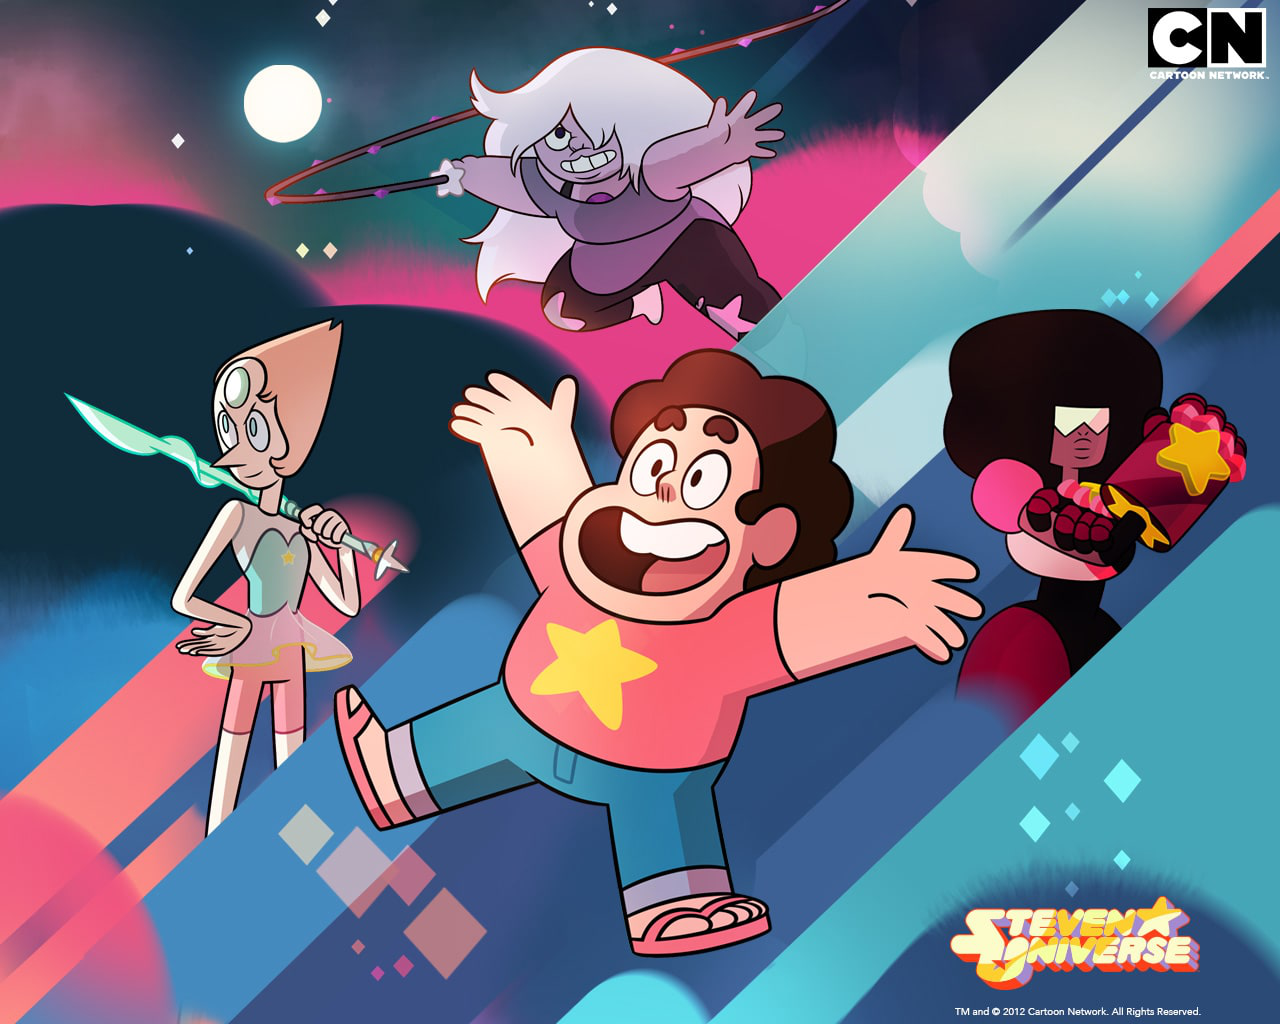

In [20]:
img_s

In [7]:
data_j = np.asarray(img_j.resize((250,250)).getdata())
data_j = data_j.flatten()
data_j.shape

(187500,)

In [8]:
data_s = np.asarray(img_s.resize((250,250)).getdata()).flatten()
data_s.shape

(187500,)

In [9]:
import os
all_data = np.array([])
teste = np.array([])

In [10]:
for idx, val in enumerate(os.listdir('imgs/')):
    img = Image.open('imgs/' + val)
    print(val)
    data = np.asarray(img.resize((250,250)).getdata()).flatten()
    print("DATA {}".format(data.shape))
    teste = np.append(teste, data)
    if idx == 0:
        all_data = data
    else:
        all_data = np.vstack((all_data, np.expand_dims(data, axis=0)))
    
all_data.shape

steven.jpeg
DATA (187500,)
jorel.jpeg
DATA (187500,)
stevn1.jpeg
DATA (187500,)
salem.jpeg
DATA (187500,)


(4, 187500)

In [29]:
def most_frequent_colour(image):
    w, h = image.size
    pixels = image.getcolors(w * h)
    most_frequent_pixel = pixels[0]
    for count, colour in pixels:
        if count > most_frequent_pixel[0]:
            most_frequent_pixel = (count, colour)

    compare("Most Common", image, most_frequent_pixel[1])
    return most_frequent_pixel

def compare(title, image, colour_tuple):
    image.show(title=title)
    image = Image.new("RGB", (200, 200,), colour_tuple)
    return image

In [37]:
w, h = img_j.size
colors = img_j.getcolors(h*w)

[(86080, 0), (197006, 1), (350563, 2), (83012, 3), (204939, 4)]
[250, 227, 191, 193, 213, 228, 181, 122, 178, 209, 91, 37, 23, 16, 18]


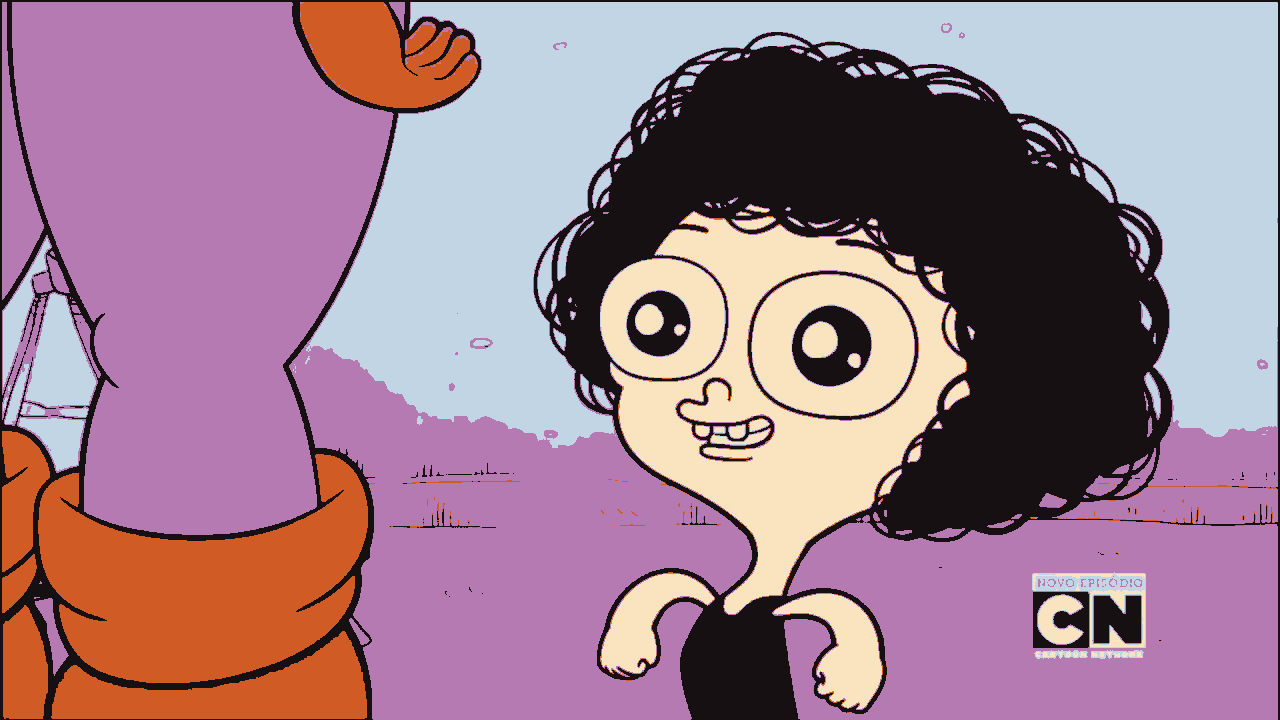

In [112]:
colors = 5
jquantized = img_j.quantize(colors=colors, kmeans=3)
print(jquantized.getcolors(w*h))
jpalette = jquantized.getpalette()[:colors*3]
print(jpalette)
jquantized

[[250, 227, 191], [193, 213, 228], [181, 122, 178], [209, 91, 37], [23, 16, 18]]


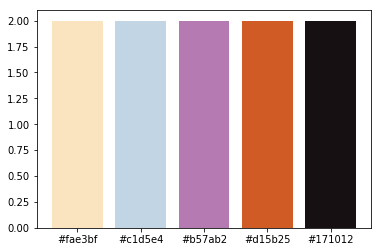

In [113]:
jcolors = []
for i in range(0, len(jpalette)-1, 3): 
    jcolors.append(jpalette[i:i+3])

print(jcolors)
show_colors(jcolors)

[(212578, 0), (255528, 1), (217842, 2), (312981, 3), (311791, 4)]
[220, 207, 199, 79, 162, 188, 216, 102, 124, 59, 83, 120, 31, 33, 45]
[[220, 207, 199], [79, 162, 188], [216, 102, 124], [59, 83, 120], [31, 33, 45]]


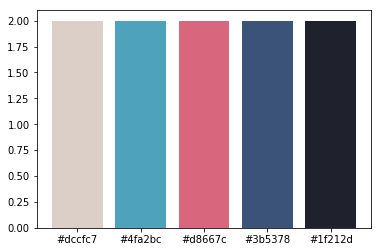

In [114]:
squantized = img_s.quantize(colors=colors, kmeans=3)
print(squantized.getcolors(w*h))
spalette = squantized.getpalette()[:colors*3]
print(spalette)
squantized

scolors = []
for i in range(0, len(spalette)-1, 3): 
    scolors.append(spalette[i:i+3])

print(scolors)
show_colors(scolors)

[36.932370625238775, 182.96174463531986, 145.84238067173752, 249.51553057875978, 326.97553425294683, 40.07492981902776, 131.13733259449805, 153.83757668398187, 215.6849554326866, 303.5341825890455, 95.84883932526257, 110.01818031580054, 67.38694235532579, 140.60227594174995, 219.33991884743642, 199.55199823604875, 211.5230483895313, 87.9715863219483, 171.618763542918, 187.38196284594736, 328.71111937383563, 230.9805186590419, 236.39162421710293, 127.23600119463045, 32.89376840679705]


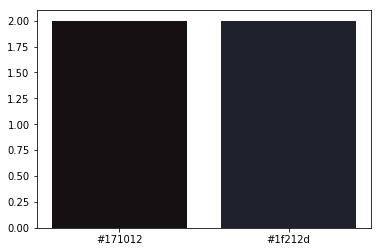

In [115]:
jcolors = np.asarray(jcolors)
scolors = np.asarray(scolors)

dist_array = []
idx = []
for i in range(0, len(jcolors)):
    for j in range(0, len(jcolors)):
        idx.append([jcolors[i], scolors[j]])
        dist_array.append(distance(jcolors[i], scolors[j]))

print(dist_array)
indexes = np.argsort(dist_array)
similar = idx[indexes[0]]
show_colors(similar)

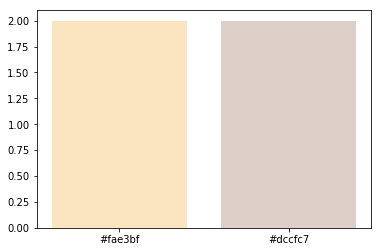

In [116]:
show_colors(idx[indexes[1]])

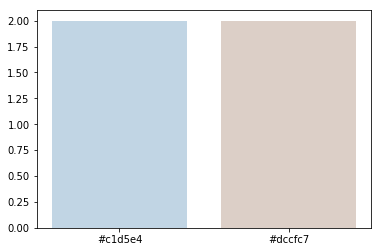

In [117]:
show_colors(idx[indexes[2]])

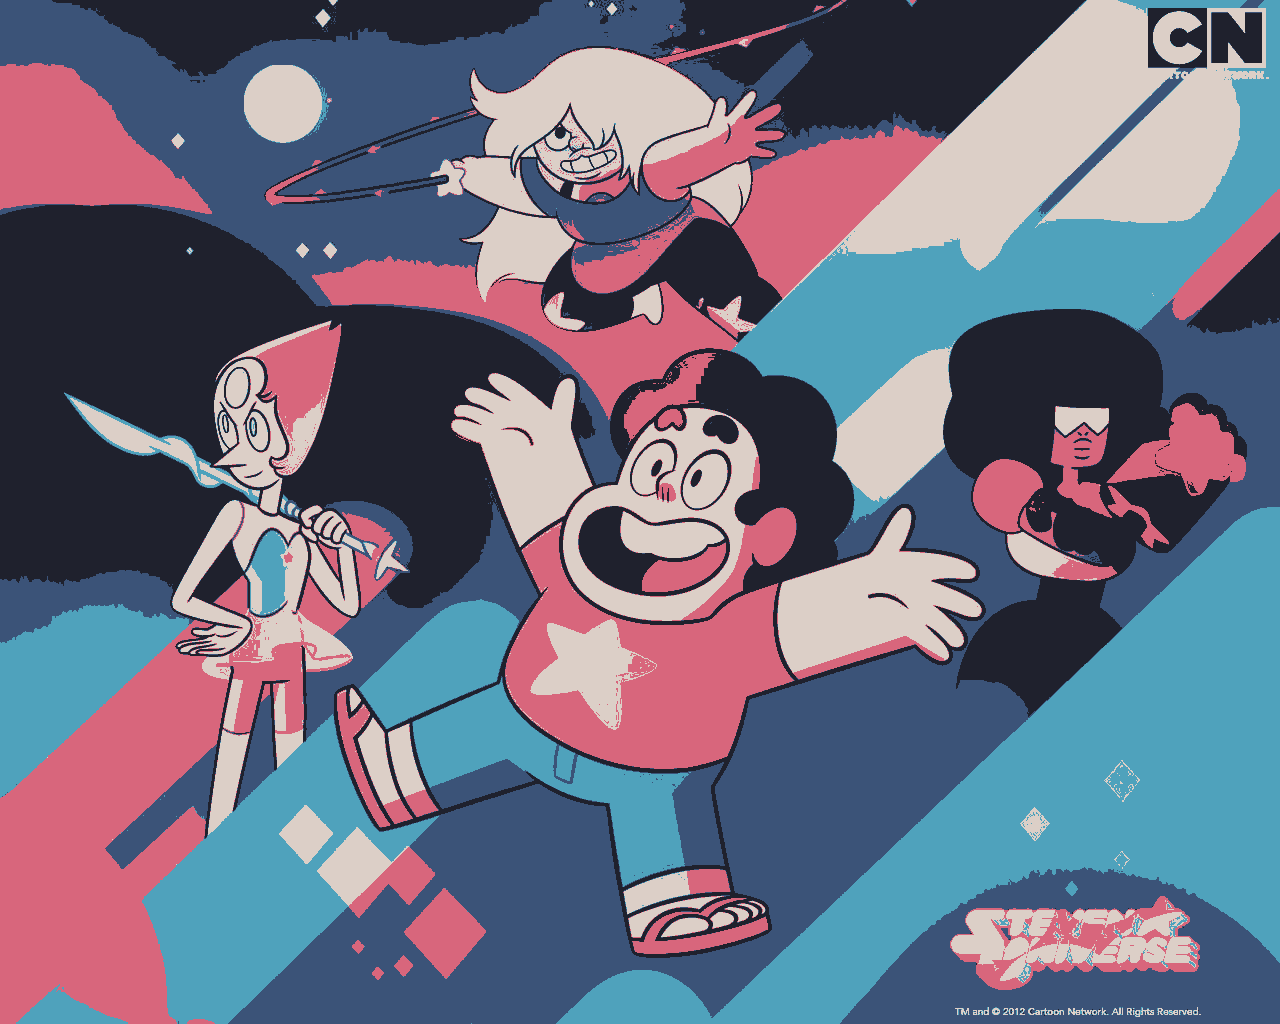

In [118]:
squantized